# Capstone Project Code

# A new Italian restaurant in London

## Use Foursquare Data to localize the best area of London where opening a new Italian restaurant

In [3]:
import numpy as np 
import pandas as pd 

In [4]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



geopy-2.1.0          | 64 KB     

In [5]:
pip install lxml html5lib beautifulsoup4 # install modules for web scraping

     |████████████████████████████████| 5.5MB 5.9MB/s eta 0:00:01     |██████▎                         | 1.1MB 5.9MB/s eta 0:00:01
     |████████████████████████████████| 122kB 30.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Import the London Borough Data

In [6]:
import os
from bs4 import BeautifulSoup

os.system('wget -q -O "London.html" "https://en.wikipedia.org/wiki/List_of_London_boroughs"')

with open('London.html', encoding='utf-8-sig') as fp:
    soup = BeautifulSoup(fp,"lxml")

data0 = []
table = soup.find("table", { "class" : "wikitable sortable" })
table_body = table.find('tbody')
rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data0.append([col.replace(u'\ufeff', '') for col in cols])

data0

[[],
 ['Barking and Dagenham [note 1]',
  '',
  '',
  'Barking and Dagenham London Borough Council',
  'Labour',
  'Town Hall, 1 Town Square',
  '13.93',
  '212,906',
  '51°33′39″N 0°09′21″E / 51.5607°N 0.1557°E / 51.5607; 0.1557 (Barking and Dagenham)',
  '25'],
 ['Barnet',
  '',
  '',
  'Barnet London Borough Council',
  'Conservative',
  'Barnet House, 2 Bristol Avenue, Colindale',
  '33.49',
  '395,896',
  '51°37′31″N 0°09′06″W / 51.6252°N 0.1517°W / 51.6252; -0.1517 (Barnet)',
  '31'],
 ['Bexley',
  '',
  '',
  'Bexley London Borough Council',
  'Conservative',
  'Civic Offices, 2 Watling Street',
  '23.38',
  '248,287',
  '51°27′18″N 0°09′02″E / 51.4549°N 0.1505°E / 51.4549; 0.1505 (Bexley)',
  '23'],
 ['Brent',
  '',
  '',
  'Brent London Borough Council',
  'Labour',
  'Brent Civic Centre, Engineers Way',
  '16.70',
  '329,771',
  '51°33′32″N 0°16′54″W / 51.5588°N 0.2817°W / 51.5588; -0.2817 (Brent)',
  '12'],
 ['Bromley',
  '',
  '',
  'Bromley London Borough Council',
  'Cons

### Make a Dataframe from the data just loaded

In [7]:
df0 = pd.DataFrame(data0)
df0

,0,1,2,3,4,5,6,7,8,9
0,None,None,None,None,None,None,None,None,None,None
1,Barking and Dagenham [note 1],,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"212,906",51°33′39″N 0°09′21″E / 51.5607°N 0.1557°E / 51...,25
2,Barnet,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"395,896",51°37′31″N 0°09′06″W / 51.6252°N 0.1517°W / 51...,31
3,Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"248,287",51°27′18″N 0°09′02″E / 51.4549°N 0.1505°E / 51...,23
4,Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"329,771",51°33′32″N 0°16′54″W / 51.5588°N 0.2817°W / 51...,12
5,Bromley,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"332,336",51°24′14″N 0°01′11″E / 51.4039°N 0.0198°E / 51...,20
6,Camden,Y,,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,"270,029",51°31′44″N 0°07′32″W / 51.5290°N 0.1255°W / 51...,11
7,Croydon,,,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"386,710",51°22′17″N 0°05′52″W / 51.3714°N 0.0977°W / 51...,19
8,Ealing,,,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,"341,806",51°30′47″N 0°18′32″W / 51.5130°N 0.3089°W / 51...,13
9,Enfield,,,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,"333,794",51°39′14″N 0°04′48″W / 51.6538°N 0.0799°W / 51...,30


### Drop the columns that will not be used in this analysis

In [8]:
df0 = df0.drop([2,3,4,5,6,7,9], axis=1)
df0 = df0.drop([0])
df0

,0,1,8
1,Barking and Dagenham [note 1],,51°33′39″N 0°09′21″E / 51.5607°N 0.1557°E / 51...
2,Barnet,,51°37′31″N 0°09′06″W / 51.6252°N 0.1517°W / 51...
3,Bexley,,51°27′18″N 0°09′02″E / 51.4549°N 0.1505°E / 51...
4,Brent,,51°33′32″N 0°16′54″W / 51.5588°N 0.2817°W / 51...
5,Bromley,,51°24′14″N 0°01′11″E / 51.4039°N 0.0198°E / 51...
6,Camden,Y,51°31′44″N 0°07′32″W / 51.5290°N 0.1255°W / 51...
7,Croydon,,51°22′17″N 0°05′52″W / 51.3714°N 0.0977°W / 51...
8,Ealing,,51°30′47″N 0°18′32″W / 51.5130°N 0.3089°W / 51...
9,Enfield,,51°39′14″N 0°04′48″W / 51.6538°N 0.0799°W / 51...
10,Greenwich [note 2],Y [note 3],51°29′21″N 0°03′53″E / 51.4892°N 0.0648°E / 51...


In [9]:
df0 = df0.reset_index(drop=True)
df0

,0,1,8
0,Barking and Dagenham [note 1],,51°33′39″N 0°09′21″E / 51.5607°N 0.1557°E / 51...
1,Barnet,,51°37′31″N 0°09′06″W / 51.6252°N 0.1517°W / 51...
2,Bexley,,51°27′18″N 0°09′02″E / 51.4549°N 0.1505°E / 51...
3,Brent,,51°33′32″N 0°16′54″W / 51.5588°N 0.2817°W / 51...
4,Bromley,,51°24′14″N 0°01′11″E / 51.4039°N 0.0198°E / 51...
5,Camden,Y,51°31′44″N 0°07′32″W / 51.5290°N 0.1255°W / 51...
6,Croydon,,51°22′17″N 0°05′52″W / 51.3714°N 0.0977°W / 51...
7,Ealing,,51°30′47″N 0°18′32″W / 51.5130°N 0.3089°W / 51...
8,Enfield,,51°39′14″N 0°04′48″W / 51.6538°N 0.0799°W / 51...
9,Greenwich [note 2],Y [note 3],51°29′21″N 0°03′53″E / 51.4892°N 0.0648°E / 51...


### Rename the columns

In [10]:
df0 = df0.rename(columns={0: "Borough", 1: "Inner", 8: "Full Coordinates"})
df0

,Borough,Inner,Full Coordinates
0,Barking and Dagenham [note 1],,51°33′39″N 0°09′21″E / 51.5607°N 0.1557°E / 51...
1,Barnet,,51°37′31″N 0°09′06″W / 51.6252°N 0.1517°W / 51...
2,Bexley,,51°27′18″N 0°09′02″E / 51.4549°N 0.1505°E / 51...
3,Brent,,51°33′32″N 0°16′54″W / 51.5588°N 0.2817°W / 51...
4,Bromley,,51°24′14″N 0°01′11″E / 51.4039°N 0.0198°E / 51...
5,Camden,Y,51°31′44″N 0°07′32″W / 51.5290°N 0.1255°W / 51...
6,Croydon,,51°22′17″N 0°05′52″W / 51.3714°N 0.0977°W / 51...
7,Ealing,,51°30′47″N 0°18′32″W / 51.5130°N 0.3089°W / 51...
8,Enfield,,51°39′14″N 0°04′48″W / 51.6538°N 0.0799°W / 51...
9,Greenwich [note 2],Y [note 3],51°29′21″N 0°03′53″E / 51.4892°N 0.0648°E / 51...


### Repeat the same steps for the City of London table (that includes only that specific Borough)

In [11]:
data1 = []
table1 = soup.find_all('table')[1]
table_body1 = table1.find('tbody')
rows1 = table_body1.find_all('tr')
for row in rows1:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data1.append([col.replace(u'\ufeff', '') for col in cols])

data1

[[],
 ['City of London',
  '(Y)[note 5]',
  'Sui generis;City;Ceremonial county',
  'Corporation of London;Inner Temple;Middle Temple',
  '?',
  'Guildhall',
  '1.12',
  '9721',
  '51°30′56″N 0°05′32″W / 51.5155°N 0.0922°W / 51.5155; -0.0922 (City of London)',
  '1']]

In [12]:
df1 = pd.DataFrame(data1)
df1 = df1.drop([2,3,4,5,6,7,9], axis=1)
df1 = df1.drop([0])
df1 = df1.rename(columns={0: "Borough", 1: "Inner", 8: "Full Coordinates"})
df1

,Borough,Inner,Full Coordinates
1,City of London,(Y)[note 5],51°30′56″N 0°05′32″W / 51.5155°N 0.0922°W / 51...


### Merge the two databases into one

In [13]:
df= pd.concat([df0, df1], ignore_index=True)
df

,Borough,Inner,Full Coordinates
0,Barking and Dagenham [note 1],,51°33′39″N 0°09′21″E / 51.5607°N 0.1557°E / 51...
1,Barnet,,51°37′31″N 0°09′06″W / 51.6252°N 0.1517°W / 51...
2,Bexley,,51°27′18″N 0°09′02″E / 51.4549°N 0.1505°E / 51...
3,Brent,,51°33′32″N 0°16′54″W / 51.5588°N 0.2817°W / 51...
4,Bromley,,51°24′14″N 0°01′11″E / 51.4039°N 0.0198°E / 51...
5,Camden,Y,51°31′44″N 0°07′32″W / 51.5290°N 0.1255°W / 51...
6,Croydon,,51°22′17″N 0°05′52″W / 51.3714°N 0.0977°W / 51...
7,Ealing,,51°30′47″N 0°18′32″W / 51.5130°N 0.3089°W / 51...
8,Enfield,,51°39′14″N 0°04′48″W / 51.6538°N 0.0799°W / 51...
9,Greenwich [note 2],Y [note 3],51°29′21″N 0°03′53″E / 51.4892°N 0.0648°E / 51...


In [14]:
df.dtypes

Borough             object
Inner               object
Full Coordinates    object
dtype: object

### We now have to change the format of the Coordinate data into something we can utilize

In [15]:
df[['Lat DMS','Long DMS','LatLong']] = df['Full Coordinates'].str.split('/',expand=True)
df = df.drop(['Full Coordinates','Lat DMS','Long DMS'], axis=1)
df

,Borough,Inner,LatLong
0,Barking and Dagenham [note 1],,51.5607; 0.1557 (Barking and Dagenham)
1,Barnet,,51.6252; -0.1517 (Barnet)
2,Bexley,,51.4549; 0.1505 (Bexley)
3,Brent,,51.5588; -0.2817 (Brent)
4,Bromley,,51.4039; 0.0198 (Bromley)
5,Camden,Y,51.5290; -0.1255 (Camden)
6,Croydon,,51.3714; -0.0977 (Croydon)
7,Ealing,,51.5130; -0.3089 (Ealing)
8,Enfield,,51.6538; -0.0799 (Enfield)
9,Greenwich [note 2],Y [note 3],51.4892; 0.0648 (Greenwich)


In [16]:
df[['Latitude','Longitude-1']] = df['LatLong'].str.split('; ',expand=True)
df = df.drop(['LatLong'], axis=1)
df

,Borough,Inner,Latitude,Longitude-1
0,Barking and Dagenham [note 1],,51.5607,0.1557 (Barking and Dagenham)
1,Barnet,,51.6252,-0.1517 (Barnet)
2,Bexley,,51.4549,0.1505 (Bexley)
3,Brent,,51.5588,-0.2817 (Brent)
4,Bromley,,51.4039,0.0198 (Bromley)
5,Camden,Y,51.5290,-0.1255 (Camden)
6,Croydon,,51.3714,-0.0977 (Croydon)
7,Ealing,,51.5130,-0.3089 (Ealing)
8,Enfield,,51.6538,-0.0799 (Enfield)
9,Greenwich [note 2],Y [note 3],51.4892,0.0648 (Greenwich)


In [17]:
df.dtypes

Borough        object
Inner          object
Latitude       object
Longitude-1    object
dtype: object

In [18]:
df["Latitude"] = pd.to_numeric(df.Latitude, errors='coerce')
df

,Borough,Inner,Latitude,Longitude-1
0,Barking and Dagenham [note 1],,51.5607,0.1557 (Barking and Dagenham)
1,Barnet,,51.6252,-0.1517 (Barnet)
2,Bexley,,51.4549,0.1505 (Bexley)
3,Brent,,51.5588,-0.2817 (Brent)
4,Bromley,,51.4039,0.0198 (Bromley)
5,Camden,Y,51.5290,-0.1255 (Camden)
6,Croydon,,51.3714,-0.0977 (Croydon)
7,Ealing,,51.5130,-0.3089 (Ealing)
8,Enfield,,51.6538,-0.0799 (Enfield)
9,Greenwich [note 2],Y [note 3],51.4892,0.0648 (Greenwich)


In [19]:
df.dtypes

Borough         object
Inner           object
Latitude       float64
Longitude-1     object
dtype: object

In [20]:
df[['Longitude','remove']] = df['Longitude-1'].str.split(' ', 1, expand=True)
df = df.drop(['remove', 'Longitude-1'], axis=1)
df

,Borough,Inner,Latitude,Longitude
0,Barking and Dagenham [note 1],,51.5607,0.1557
1,Barnet,,51.6252,-0.1517
2,Bexley,,51.4549,0.1505
3,Brent,,51.5588,-0.2817
4,Bromley,,51.4039,0.0198
5,Camden,Y,51.5290,-0.1255
6,Croydon,,51.3714,-0.0977
7,Ealing,,51.5130,-0.3089
8,Enfield,,51.6538,-0.0799
9,Greenwich [note 2],Y [note 3],51.4892,0.0648


In [21]:
df["Longitude"] = pd.to_numeric(df.Longitude, errors='coerce')
df

,Borough,Inner,Latitude,Longitude
0,Barking and Dagenham [note 1],,51.5607,0.1557
1,Barnet,,51.6252,-0.1517
2,Bexley,,51.4549,0.1505
3,Brent,,51.5588,-0.2817
4,Bromley,,51.4039,0.0198
5,Camden,Y,51.5290,-0.1255
6,Croydon,,51.3714,-0.0977
7,Ealing,,51.5130,-0.3089
8,Enfield,,51.6538,-0.0799
9,Greenwich [note 2],Y [note 3],51.4892,0.0648


In [22]:
df.dtypes

Borough       object
Inner         object
Latitude     float64
Longitude    float64
dtype: object

### Remove the notes and change the 'Inner' column values from "Y/N" to "Inner London/Outer London"

In [23]:
df = df.replace('Barking and Dagenham [note 1]', 'Barking and Dagenham')
df = df.replace('Greenwich [note 2]', 'Greenwich')
df = df.replace('Hammersmith and Fulham [note 4]', 'Hammersmith and Fulham')
df

,Borough,Inner,Latitude,Longitude
0,Barking and Dagenham,,51.5607,0.1557
1,Barnet,,51.6252,-0.1517
2,Bexley,,51.4549,0.1505
3,Brent,,51.5588,-0.2817
4,Bromley,,51.4039,0.0198
5,Camden,Y,51.5290,-0.1255
6,Croydon,,51.3714,-0.0977
7,Ealing,,51.5130,-0.3089
8,Enfield,,51.6538,-0.0799
9,Greenwich,Y [note 3],51.4892,0.0648


In [24]:
df = df.replace('[note 3]', 'Y')
df = df.replace('Y [note 3]', '')
df = df.replace('(Y)[note 5]', 'Y')
df

,Borough,Inner,Latitude,Longitude
0,Barking and Dagenham,,51.5607,0.1557
1,Barnet,,51.6252,-0.1517
2,Bexley,,51.4549,0.1505
3,Brent,,51.5588,-0.2817
4,Bromley,,51.4039,0.0198
5,Camden,Y,51.5290,-0.1255
6,Croydon,,51.3714,-0.0977
7,Ealing,,51.5130,-0.3089
8,Enfield,,51.6538,-0.0799
9,Greenwich,,51.4892,0.0648


In [25]:
df['Inner'] = df['Inner'].map({'Y': 'Inner London', '': 'Outer London'})
df

,Borough,Inner,Latitude,Longitude
0,Barking and Dagenham,Outer London,51.5607,0.1557
1,Barnet,Outer London,51.6252,-0.1517
2,Bexley,Outer London,51.4549,0.1505
3,Brent,Outer London,51.5588,-0.2817
4,Bromley,Outer London,51.4039,0.0198
5,Camden,Inner London,51.5290,-0.1255
6,Croydon,Outer London,51.3714,-0.0977
7,Ealing,Outer London,51.5130,-0.3089
8,Enfield,Outer London,51.6538,-0.0799
9,Greenwich,Outer London,51.4892,0.0648


In [26]:
df.dtypes

Borough       object
Inner         object
Latitude     float64
Longitude    float64
dtype: object

### Let's create an interactive map with all the London Boroughs to visualise them

In [27]:
# use City of London as central coordinates for the map
latitude = 51.5155
longitude = -0.0922

In [28]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=11, control_scale = True)

# add markers to map
for lat, lng, borough, inout in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Inner']):
    label = '{}, {}'.format(borough, inout)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.5,
        parse_html=False).add_to(map_london)  
    
map_london

### We now use the Borough of "Kensigton and Chelsea" as an example to test Foursquare and see which data we can obtain from it

In [86]:
# ID AND SECRET NOT DISPLAYED FOR PRIVACY REASONS
CLIENT_ID = '****' # your Foursquare ID
CLIENT_SECRET = '****' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [30]:
# Example Kensington

borough_latitude = df.loc[18, 'Latitude'] # neighborhood latitude value
borough_longitude = df.loc[18, 'Longitude'] # neighborhood longitude value

borough_name = df.loc[18, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               borough_latitude, 
                                                               borough_longitude))

Latitude and longitude values of Kensington and Chelsea are 51.502, -0.1947.


In [31]:
# OBtain the top venues in Kensington

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    100)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=FNZZS0IQSFUGNZX0AIWLOJJVO1TYCIZFAZOXSXIHG1BUGBDZ&client_secret=UXMJYAFRNPHPVJXWP2QZGOMUHFJHQUS5YJFDWYRIOOZ2ZNFL&v=20180605&ll=51.502,-0.1947&radius=1500&limit=100'

In [32]:
results = requests.get(url).json()

In [33]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### We can finally take a look at the first 20 locations that we found and make sure that we can obtain the category type

In [34]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Dishoom,Indian Restaurant,51.501301,-0.191170
1,The Ivy Kensington Brasserie,Restaurant,51.501453,-0.192156
2,Whole Foods Market,Grocery Store,51.501716,-0.190179
3,Ole & Steen,Bakery,51.501836,-0.192037
4,COS,Clothing Store,51.500827,-0.193687
5,Yashin Sushi,Sushi Restaurant,51.500509,-0.195507
6,Japan House,Art Gallery,51.501489,-0.191670
7,JOE & THE JUICE,Juice Bar,51.502339,-0.189985
8,Warner Music,Recording Studio,51.500104,-0.192943
9,Core Collective,Gym / Fitness Center,51.499589,-0.198630


In [35]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


### We need a function to iterate the process for all Boroughs

In [36]:
# All Boroughs now. create a function to do it for all boroughs

def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)



### To simplify the analysis and the visualisation we create the Dataframes "Inner" and "Outer" London, it will be used later

In [37]:
inner_df = df.loc[df['Inner'] == 'Inner London']
inner_df = inner_df.reset_index(drop=True)
inner_df

,Borough,Inner,Latitude,Longitude
0,Camden,Inner London,51.5290,-0.1255
1,Hackney,Inner London,51.5450,-0.0553
2,Hammersmith and Fulham,Inner London,51.4927,-0.2339
3,Haringey,Inner London,51.6000,-0.1119
4,Islington,Inner London,51.5416,-0.1022
5,Kensington and Chelsea,Inner London,51.5020,-0.1947
6,Lambeth,Inner London,51.4607,-0.1163
7,Lewisham,Inner London,51.4452,-0.0209
8,Newham,Inner London,51.5077,0.0469
9,Southwark,Inner London,51.5035,-0.0804


In [38]:
outer_df = df.loc[df['Inner'] == 'Outer London']
outer_df = outer_df.reset_index(drop=True)
outer_df

,Borough,Inner,Latitude,Longitude
0,Barking and Dagenham,Outer London,51.5607,0.1557
1,Barnet,Outer London,51.6252,-0.1517
2,Bexley,Outer London,51.4549,0.1505
3,Brent,Outer London,51.5588,-0.2817
4,Bromley,Outer London,51.4039,0.0198
5,Croydon,Outer London,51.3714,-0.0977
6,Ealing,Outer London,51.5130,-0.3089
7,Enfield,Outer London,51.6538,-0.0799
8,Greenwich,Outer London,51.4892,0.0648
9,Harrow,Outer London,51.5898,-0.3346


### Let's get the venues for Inner and Outer databases

In [39]:
inner_london_venues = getNearbyVenues(names=inner_df['Borough'],
                                   latitudes=inner_df['Latitude'],
                                   longitudes=inner_df['Longitude'],
                                radius = 1500
                                  )

Camden
Hackney
Hammersmith and Fulham
Haringey
Islington
Kensington and Chelsea
Lambeth
Lewisham
Newham
Southwark
Tower Hamlets
Wandsworth
Westminster
City of London


In [40]:
outer_london_venues = getNearbyVenues(names=outer_df['Borough'],
                                   latitudes=outer_df['Latitude'],
                                   longitudes=outer_df['Longitude'],
                                radius = 2500
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Croydon
Ealing
Enfield
Greenwich
Harrow
Havering
Hillingdon
Hounslow
Kingston upon Thames
Merton
Redbridge
Richmond upon Thames
Sutton
Waltham Forest


### We  now have a database with all the popular locations, and we can show the first 50

In [41]:
london_venues= pd.concat([inner_london_venues, outer_london_venues], ignore_index=True)

In [42]:
print(london_venues.shape)
london_venues.head(50)

(2777, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Camden,51.529,-0.1255,The Sir John Ritblat Gallery: Treasures of the...,51.529666,-0.127541,Museum
1,Camden,51.529,-0.1255,St. Pancras Renaissance Hotel London,51.529733,-0.125912,Hotel
2,Camden,51.529,-0.1255,Pitted Olive,51.526369,-0.125623,Turkish Restaurant
3,Camden,51.529,-0.1255,London St Pancras International Railway Statio...,51.531982,-0.126086,Train Station
4,Camden,51.529,-0.1255,Aux Pains de Papy,51.529340,-0.120303,Bakery
5,Camden,51.529,-0.1255,Granger & Co.,51.532606,-0.125275,Breakfast Spot
6,Camden,51.529,-0.1255,Barry's Bootcamp,51.527075,-0.131056,Gym / Fitness Center
7,Camden,51.529,-0.1255,Store St Espresso,51.525658,-0.125075,Coffee Shop
8,Camden,51.529,-0.1255,M&S Simply Food,51.532800,-0.127123,Grocery Store
9,Camden,51.529,-0.1255,Pizza Union,51.530984,-0.119933,Pizza Place


### We can display how many locations we found for each Borough

In [43]:
total_venues_per_borough = london_venues.groupby('Borough').count()
total_venues_per_borough

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Barking and Dagenham,67,67,67,67,67,67
Barnet,90,90,90,90,90,90
Bexley,65,65,65,65,65,65
Brent,100,100,100,100,100,100
Bromley,43,43,43,43,43,43
Camden,100,100,100,100,100,100
City of London,100,100,100,100,100,100
Croydon,80,80,80,80,80,80
Ealing,100,100,100,100,100,100


In [44]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 278 uniques categories.


### These are all the unique cathegories found

In [45]:
unique_categories = pd.DataFrame(london_venues['Venue Category'].unique())
print(unique_categories.to_string())

                                            0
0                                      Museum
1                                       Hotel
2                          Turkish Restaurant
3                               Train Station
4                                      Bakery
5                              Breakfast Spot
6                        Gym / Fitness Center
7                                 Coffee Shop
8                               Grocery Store
9                                 Pizza Place
10                 Modern European Restaurant
11                             Sandwich Place
12                                Art Gallery
13                                       Café
14                                      Plaza
15                  Middle Eastern Restaurant
16                                   Beer Bar
17                          Indian Restaurant
18                                      Canal
19                                     Garden
20                                

### Below we have a list of categories that has to be included into the "Restaurant" group

In [46]:
# Pizza Place
# Steakhouse
# Fish & Chips Shop
# Sandwich Place
# Fried Chicken Joint
# Burger Joint
# Bistro
# Diner
# Gastropub
# Street Food Gathering
# Burrito Place
# Salad Place
# Noodle House
# Food Truck
# BBQ Joint
# Chaat Place
# Food Court

In [47]:
print('There are {} Restaurants.'.format(len(london_venues[london_venues['Venue Category'].str.contains("Restaurant")])))

There are 580 Restaurants.


In [48]:
london_venues = london_venues.replace('Pizza Place', 'Italian Restaurant')
london_venues = london_venues.replace('Steakhouse', 'Steakhouse Restaurant')
london_venues = london_venues.replace('Fish & Chips Shop', 'Fish & Chips Restaurant')
london_venues = london_venues.replace('Sandwich Place', 'Sandwich Restaurant')
london_venues = london_venues.replace('Fried Chicken Joint', 'Fried Chicken Restaurant')
london_venues = london_venues.replace('Burger Joint', 'Burger Restaurant')
london_venues = london_venues.replace('Bistro', 'Bistro Restaurant')
london_venues = london_venues.replace('Diner', 'Diner Restaurant')
london_venues = london_venues.replace('Gastropub', 'Gastropub Restaurant')
london_venues = london_venues.replace('Street Food Gathering', 'Street Food Restaurant')
london_venues = london_venues.replace('Burrito Place', 'Burrito Restaurant')
london_venues = london_venues.replace('Salad Place', 'Salad Restaurant')
london_venues = london_venues.replace('Noodle House', 'Noodle Restaurant')
london_venues = london_venues.replace('Food Truck', 'Food Truck Restaurant')
london_venues = london_venues.replace('BBQ Joint', 'BBQ Restaurant')
london_venues = london_venues.replace('Chaat Place', 'Chaat Restaurant')
london_venues = london_venues.replace('Food Court', 'Food Court Restaurant')

print('There are {} restaurants.'.format(len(london_venues[london_venues['Venue Category'].str.contains("Restaurant")])))
print('There are {} uniques categories of restaurant.'.format(len(london_venues[london_venues['Venue Category'].str.contains("Restaurant")]['Venue Category'].unique())))
print('There are {} italian restaurants.'.format(len(london_venues[london_venues['Venue Category'].str.contains("Italian Restaurant")])))

There are 801 restaurants.
There are 73 uniques categories of restaurant.
There are 131 italian restaurants.


In [49]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 277 uniques categories.


### Use OneHot encoding and then group the database by Borough

In [50]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

In [51]:
pd.options.display.max_columns = 500 
london_onehot.head(9)

,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Restaurant,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro Restaurant,Boarding House,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Bulgarian Restaurant,Burger Restaurant,Burrito Restaurant,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Canal,Canal Lock,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dam,Deli / Bodega,Department Store,Dessert Shop,Diner Restaurant,Discount Store,Distillery,Doner Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Restaurant,Fish Market,Flea Market,Food & Drink Shop,Food Court Restaurant,Food Stand,Food Truck Restaurant,Forest,Fountain,French Restaurant,Fried Chicken Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub Restaurant,Gelato Shop,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Newsstand,Nightclub,Noodle Restaurant,Nursery School,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outlet Mall,Outlet Store,Paintball Field,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Reservoir,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Salad Restaurant,Sandwich Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse Restaurant,Street Art,Street Food Restaurant,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wat

In [52]:
london_onehot.shape

(2777, 278)

In [53]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Restaurant,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro Restaurant,Boarding House,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Bulgarian Restaurant,Burger Restaurant,Burrito Restaurant,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Canal,Canal Lock,Caribbean Restaurant,Castle,Caucasian Restaurant,Chaat Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dam,Deli / Bodega,Department Store,Dessert Shop,Diner Restaurant,Discount Store,Distillery,Doner Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Restaurant,Fish Market,Flea Market,Food & Drink Shop,Food Court Restaurant,Food Stand,Food Truck Restaurant,Forest,Fountain,French Restaurant,Fried Chicken Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub Restaurant,Gelato Shop,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Newsstand,Nightclub,Noodle Restaurant,Nursery School,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outlet Mall,Outlet Store,Paintball Field,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Reservoir,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Salad Restaurant,Sandwich Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse Restaurant,Street Art,Street Food Restaurant,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wat

In [54]:
london_grouped.shape

(33, 278)

### The frequency of Italian restaurants for each borough can be visualised.

In [55]:
london_italian = london_grouped[['Borough', 'Italian Restaurant']]

london_italian

,Borough,Italian Restaurant
0,Barking and Dagenham,0.044776
1,Barnet,0.077778
2,Bexley,0.046154
3,Brent,0.050000
4,Bromley,0.069767
5,Camden,0.050000
6,City of London,0.050000
7,Croydon,0.025000
8,Ealing,0.090000
9,Enfield,0.048387


In [56]:
london_DF_1 = pd.merge(london_italian, df, on='Borough')
london_DF_1

,Borough,Italian Restaurant,Inner,Latitude,Longitude
0,Barking and Dagenham,0.044776,Outer London,51.5607,0.1557
1,Barnet,0.077778,Outer London,51.6252,-0.1517
2,Bexley,0.046154,Outer London,51.4549,0.1505
3,Brent,0.050000,Outer London,51.5588,-0.2817
4,Bromley,0.069767,Outer London,51.4039,0.0198
5,Camden,0.050000,Inner London,51.5290,-0.1255
6,City of London,0.050000,Inner London,51.5155,-0.0922
7,Croydon,0.025000,Outer London,51.3714,-0.0977
8,Ealing,0.090000,Outer London,51.5130,-0.3089
9,Enfield,0.048387,Outer London,51.6538,-0.0799


### We create a database with only "Restaurant" categories

In [57]:
london_restaurant = london_grouped.rename(columns={"Borough": "Borough Restaurant"})
london_restaurant = london_restaurant.filter(regex='Restaurant')
london_restaurant = london_restaurant.rename(columns={"Borough Restaurant": "Borough"})
london_restaurant

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,BBQ Restaurant,Bistro Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Burger Restaurant,Burrito Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chaat Restaurant,Chinese Restaurant,Diner Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Restaurant,Food Court Restaurant,Food Truck Restaurant,French Restaurant,Fried Chicken Restaurant,Gastropub Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hunan Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Noodle Restaurant,Okonomiyaki Restaurant,Persian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Restaurant,Sandwich Restaurant,Scandinavian Restaurant,Scottish Restaurant,Seafood Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse Restaurant,Street Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Barking and Dagenham,0.000000,0.000000,0.029851,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.00,0.014925,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.044776,0.000000,0.0000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.044776,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.014925,0.000000,0.000000
1,Barnet,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.011111,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.022222,0.000000,0.00,0.000000,0.000,0.00,0.000000,0.00,0.00,0.022222,0.022222,0.000000,0.00,0.011111,0.011111,0.000000,0.000000,0.011111,0.00,0.00,0.022222,0.077778,0.000000,0.0000,0.00,0.011111,0.0000,0.011111,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.00,0.00,0.022222,0.000000,0.000000,0.00,0.011111,0.00,0.00,0.00,0.000000,0.000,0.00,0.011111,0.011111,0.00,0.011111,0.00,0.000000,0.011111,0.033333,0.000000,0.000000
2,Bexley,0.000000,0.000000,0.015385,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.015385,0.000000,0.00,0.000000,0.000,0.00,0.015385,0.00,0.00,0.015385,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.015385,0.00,0.00,0.000000,0.046154,0.000000,0.0000,0.00,0.000000,0.0000,0.015385,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.015385,0.00,0.015385,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,0.015385,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Brent,0.000000,0.000000,0.020000,0.00,0.010000,0.00,0.000000,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.010000,0.00,0.000000,0.000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.080000,0.050000,0.000000,0.0000,0.01,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.020000,0.000000,0.010000,0.00,0.060000,0.02,0.00,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,Bromley,0.000000,0.000000,0.023256,0.00,0.023256,0.00,0.000000,0.000000,0.000000,0.00,0.023256,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.00,0.000000,0.00,0.00

In [58]:
london_restaurant.shape

(33, 74)

In [59]:
london_restaurant['All Restaurants'] = london_restaurant.sum(axis=1)
london_restaurant

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,BBQ Restaurant,Bistro Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Burger Restaurant,Burrito Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chaat Restaurant,Chinese Restaurant,Diner Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Restaurant,Food Court Restaurant,Food Truck Restaurant,French Restaurant,Fried Chicken Restaurant,Gastropub Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hunan Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Noodle Restaurant,Okonomiyaki Restaurant,Persian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Restaurant,Sandwich Restaurant,Scandinavian Restaurant,Scottish Restaurant,Seafood Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse Restaurant,Street Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,All Restaurants
0,Barking and Dagenham,0.000000,0.000000,0.029851,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.00,0.014925,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.044776,0.000000,0.0000,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.044776,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.014925,0.000000,0.000000,0.149254
1,Barnet,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.011111,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.022222,0.000000,0.00,0.000000,0.000,0.00,0.000000,0.00,0.00,0.022222,0.022222,0.000000,0.00,0.011111,0.011111,0.000000,0.000000,0.011111,0.00,0.00,0.022222,0.077778,0.000000,0.0000,0.00,0.011111,0.0000,0.011111,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.00,0.00,0.022222,0.000000,0.000000,0.00,0.011111,0.00,0.00,0.00,0.000000,0.000,0.00,0.011111,0.011111,0.00,0.011111,0.00,0.000000,0.011111,0.033333,0.000000,0.000000,0.355556
2,Bexley,0.000000,0.000000,0.015385,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.015385,0.000000,0.00,0.000000,0.000,0.00,0.015385,0.00,0.00,0.015385,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.015385,0.00,0.00,0.000000,0.046154,0.000000,0.0000,0.00,0.000000,0.0000,0.015385,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.015385,0.00,0.015385,0.00,0.00,0.00,0.000000,0.000,0.00,0.000000,0.015385,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
3,Brent,0.000000,0.000000,0.020000,0.00,0.010000,0.00,0.000000,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.010000,0.00,0.000000,0.000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.080000,0.050000,0.000000,0.0000,0.01,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.020000,0.000000,0.010000,0.00,0.060000,0.02,0.00,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.320000
4,Bromley,0.000000,0.000000,0.023256,0.00,0.023256,0.00,0.000000,0.000000,0.000000,0.00,0.023256,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,

In [60]:
london_restaurant.shape

(33, 75)

### The frequency of restaurants (all types of restaurants) for each borough can be visualised.

In [61]:
london_restaurant = london_restaurant[['Borough', 'All Restaurants']]
london_restaurant

,Borough,All Restaurants
0,Barking and Dagenham,0.149254
1,Barnet,0.355556
2,Bexley,0.200000
3,Brent,0.320000
4,Bromley,0.348837
5,Camden,0.290000
6,City of London,0.290000
7,Croydon,0.362500
8,Ealing,0.410000
9,Enfield,0.225806


In [62]:
london_DF = pd.merge(london_restaurant, london_DF_1, on='Borough')
london_DF

,Borough,All Restaurants,Italian Restaurant,Inner,Latitude,Longitude
0,Barking and Dagenham,0.149254,0.044776,Outer London,51.5607,0.1557
1,Barnet,0.355556,0.077778,Outer London,51.6252,-0.1517
2,Bexley,0.200000,0.046154,Outer London,51.4549,0.1505
3,Brent,0.320000,0.050000,Outer London,51.5588,-0.2817
4,Bromley,0.348837,0.069767,Outer London,51.4039,0.0198
5,Camden,0.290000,0.050000,Inner London,51.5290,-0.1255
6,City of London,0.290000,0.050000,Inner London,51.5155,-0.0922
7,Croydon,0.362500,0.025000,Outer London,51.3714,-0.0977
8,Ealing,0.410000,0.090000,Outer London,51.5130,-0.3089
9,Enfield,0.225806,0.048387,Outer London,51.6538,-0.0799


In [63]:
london_DF.set_index('Borough', inplace=True)

### We now have a database with Italian restaurant frequency, restaurant frequecy and coordinates

In [64]:
london_DF

,All Restaurants,Italian Restaurant,Inner,Latitude,Longitude
Borough,,,,,
Barking and Dagenham,0.149254,0.044776,Outer London,51.5607,0.1557
Barnet,0.355556,0.077778,Outer London,51.6252,-0.1517
Bexley,0.200000,0.046154,Outer London,51.4549,0.1505
Brent,0.320000,0.050000,Outer London,51.5588,-0.2817
Bromley,0.348837,0.069767,Outer London,51.4039,0.0198
Camden,0.290000,0.050000,Inner London,51.5290,-0.1255
City of London,0.290000,0.050000,Inner London,51.5155,-0.0922
Croydon,0.362500,0.025000,Outer London,51.3714,-0.0977
Ealing,0.410000,0.090000,Outer London,51.5130,-0.3089


In [65]:
london_DF.dtypes

All Restaurants       float64
Italian Restaurant    float64
Inner                  object
Latitude              float64
Longitude             float64
dtype: object

In [66]:
london_DF = london_DF.sort_values(by =['All Restaurants', 'Italian Restaurant'])
london_DF

,All Restaurants,Italian Restaurant,Inner,Latitude,Longitude
Borough,,,,,
Barking and Dagenham,0.149254,0.044776,Outer London,51.5607,0.1557
Greenwich,0.151515,0.045455,Outer London,51.4892,0.0648
Newham,0.163636,0.018182,Inner London,51.5077,0.0469
Havering,0.183333,0.050000,Outer London,51.5812,0.1837
Sutton,0.196970,0.090909,Outer London,51.3618,-0.1945
Bexley,0.200000,0.046154,Outer London,51.4549,0.1505
Wandsworth,0.204545,0.034091,Inner London,51.4567,-0.1910
Hackney,0.220000,0.030000,Inner London,51.5450,-0.0553
Lewisham,0.220000,0.080000,Inner London,51.4452,-0.0209


In [67]:
london_DF.shape

(33, 5)

In [68]:
london_DF = london_DF.sort_values(by =['Italian Restaurant', 'All Restaurants'])
london_DF

,All Restaurants,Italian Restaurant,Inner,Latitude,Longitude
Borough,,,,,
Hillingdon,0.232143,0.017857,Outer London,51.5441,-0.4760
Newham,0.163636,0.018182,Inner London,51.5077,0.0469
Haringey,0.320000,0.020000,Inner London,51.6000,-0.1119
Hounslow,0.315217,0.021739,Outer London,51.4746,-0.3680
Kingston upon Thames,0.255556,0.022222,Outer London,51.4085,-0.3064
Croydon,0.362500,0.025000,Outer London,51.3714,-0.0977
Hackney,0.220000,0.030000,Inner London,51.5450,-0.0553
Westminster,0.250000,0.030000,Inner London,51.4973,-0.1372
Wandsworth,0.204545,0.034091,Inner London,51.4567,-0.1910


In [69]:
london_DF_outer = london_DF.loc[london_DF['Inner'] == 'Outer London']
london_DF_outer

,All Restaurants,Italian Restaurant,Inner,Latitude,Longitude
Borough,,,,,
Hillingdon,0.232143,0.017857,Outer London,51.5441,-0.4760
Hounslow,0.315217,0.021739,Outer London,51.4746,-0.3680
Kingston upon Thames,0.255556,0.022222,Outer London,51.4085,-0.3064
Croydon,0.362500,0.025000,Outer London,51.3714,-0.0977
Richmond upon Thames,0.230000,0.040000,Outer London,51.4479,-0.3260
Waltham Forest,0.250000,0.040000,Outer London,51.5908,-0.0134
Merton,0.380282,0.042254,Outer London,51.4014,-0.1958
Barking and Dagenham,0.149254,0.044776,Outer London,51.5607,0.1557
Greenwich,0.151515,0.045455,Outer London,51.4892,0.0648


In [70]:
london_DF_inner = london_DF.loc[london_DF['Inner'] == 'Inner London']
london_DF_inner

,All Restaurants,Italian Restaurant,Inner,Latitude,Longitude
Borough,,,,,
Newham,0.163636,0.018182,Inner London,51.5077,0.0469
Haringey,0.320000,0.020000,Inner London,51.6000,-0.1119
Hackney,0.220000,0.030000,Inner London,51.5450,-0.0553
Westminster,0.250000,0.030000,Inner London,51.4973,-0.1372
Wandsworth,0.204545,0.034091,Inner London,51.4567,-0.1910
Lambeth,0.402299,0.034483,Inner London,51.4607,-0.1163
Islington,0.310000,0.040000,Inner London,51.5416,-0.1022
Camden,0.290000,0.050000,Inner London,51.5290,-0.1255
City of London,0.290000,0.050000,Inner London,51.5155,-0.0922


In [71]:
london_DF_inner.dtypes

All Restaurants       float64
Italian Restaurant    float64
Inner                  object
Latitude              float64
Longitude             float64
dtype: object

In [72]:
london_DF_inner_ALL = london_DF_inner['All Restaurants']
london_DF_inner_ALL = london_DF_inner_ALL.sort_values()
london_DF_inner_ITA = london_DF_inner['Italian Restaurant']
london_DF_inner_ITA = london_DF_inner_ITA.sort_values()

london_DF_outer_ALL = london_DF_outer['All Restaurants']
london_DF_outer_ALL = london_DF_outer_ALL.sort_values()
london_DF_outer_ITA = london_DF_outer['Italian Restaurant']
london_DF_outer_ITA = london_DF_outer_ITA.sort_values()

In [73]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.3


### Let's take a look at the Italian restaurant frequency (IRF) and the restaurant frequency (RF) for the Inner London Boroughs

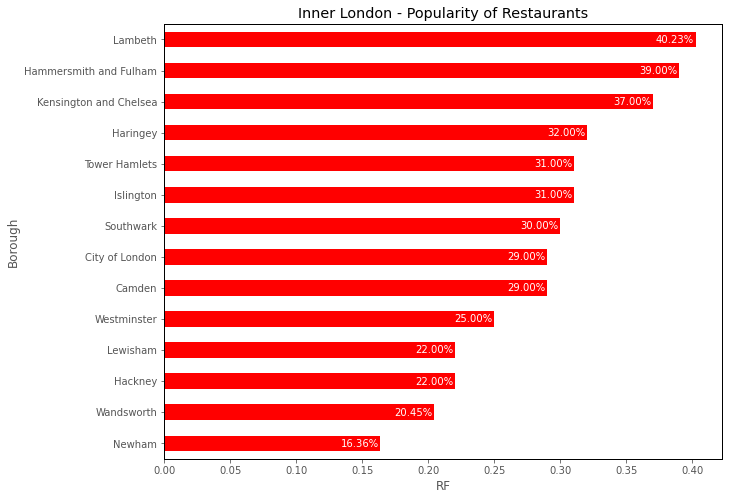

In [74]:
### inner all restaurant
a = london_DF_inner_ALL.plot(kind='barh', figsize=(10, 8), color='red')
plt.xlabel('RF')
plt.title('Inner London - Popularity of Restaurants')


for index, value in enumerate(london_DF_inner_ALL): 
    label = format(format(value,'.2%')) # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0.03, index - 0.10), color='white')

a.spines['bottom'].set_color('black')
a.spines['top'].set_color('black')
a.spines['right'].set_color('black')
a.spines['left'].set_color('black')
a.set_facecolor('white')        
    
plt.show()

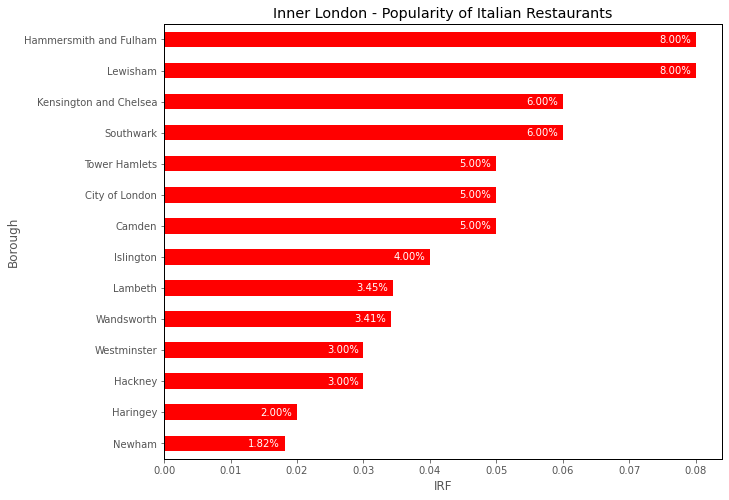

In [75]:
### inner italian restaurant
a = london_DF_inner_ITA.plot(kind='barh', figsize=(10, 8), color='red')
plt.xlabel('IRF')
plt.title('Inner London - Popularity of Italian Restaurants')


for index, value in enumerate(london_DF_inner_ITA): 
    label = format(format(value,'.2%')) # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0.0055, index - 0.10), color='white')

a.spines['bottom'].set_color('black')
a.spines['top'].set_color('black')
a.spines['right'].set_color('black')
a.spines['left'].set_color('black')
a.set_facecolor('white')    
    
plt.show()

### Let's take a look at the Italian restaurant frequency (IRF) and the restaurant frequency (RF) for the Outer London Boroughs

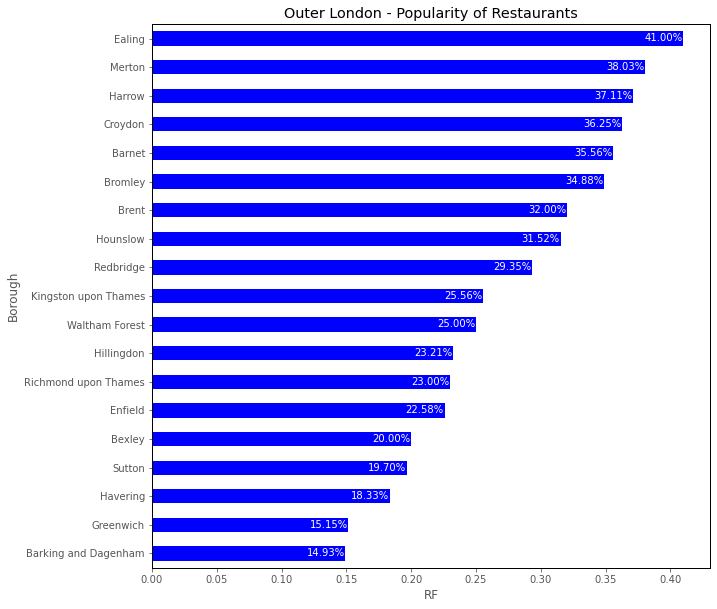

In [76]:
### outer all restaurant
a = london_DF_outer_ALL.plot(kind='barh', figsize=(10, 10), color='blue')
plt.xlabel('RF')
plt.title('Outer London - Popularity of Restaurants')


for index, value in enumerate(london_DF_outer_ALL): 
    label = format(format(value,'.2%')) # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0.03, index - 0.10), color='white')

a.spines['bottom'].set_color('black')
a.spines['top'].set_color('black')
a.spines['right'].set_color('black')
a.spines['left'].set_color('black')
a.set_facecolor('white')    
    
plt.show()

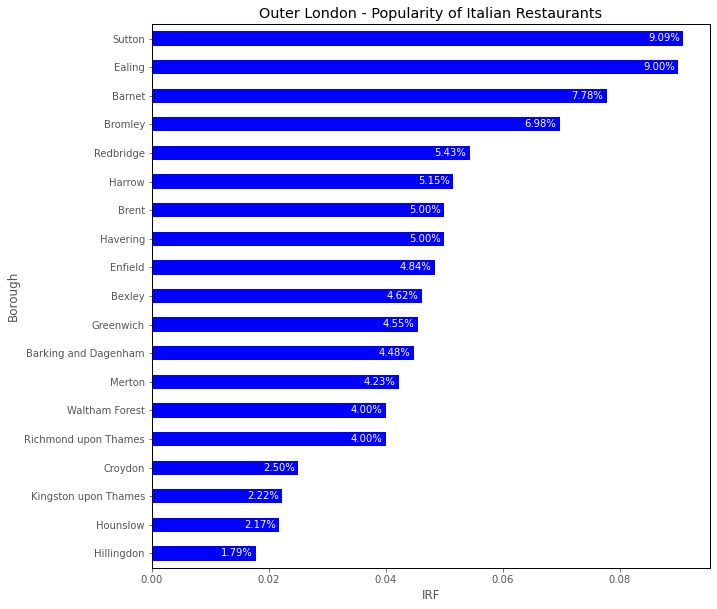

In [77]:
### outer italian restaurant
a = london_DF_outer_ITA.plot(kind='barh', figsize=(10, 10), color='blue')
plt.xlabel('IRF')
plt.title('Outer London - Popularity of Italian Restaurants')


for index, value in enumerate(london_DF_outer_ITA): 
    label = format(format(value,'.2%')) # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 0.006, index - 0.10), color='white')

a.spines['bottom'].set_color('black')
a.spines['top'].set_color('black')
a.spines['right'].set_color('black')
a.spines['left'].set_color('black')
a.set_facecolor('white')    
    
plt.show()

### We now can plot both variables in the same plot, and display all Boroughs (Inner and Outer)
### The closest to the origin will be the best Boroughs to open an italian restaurant

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator


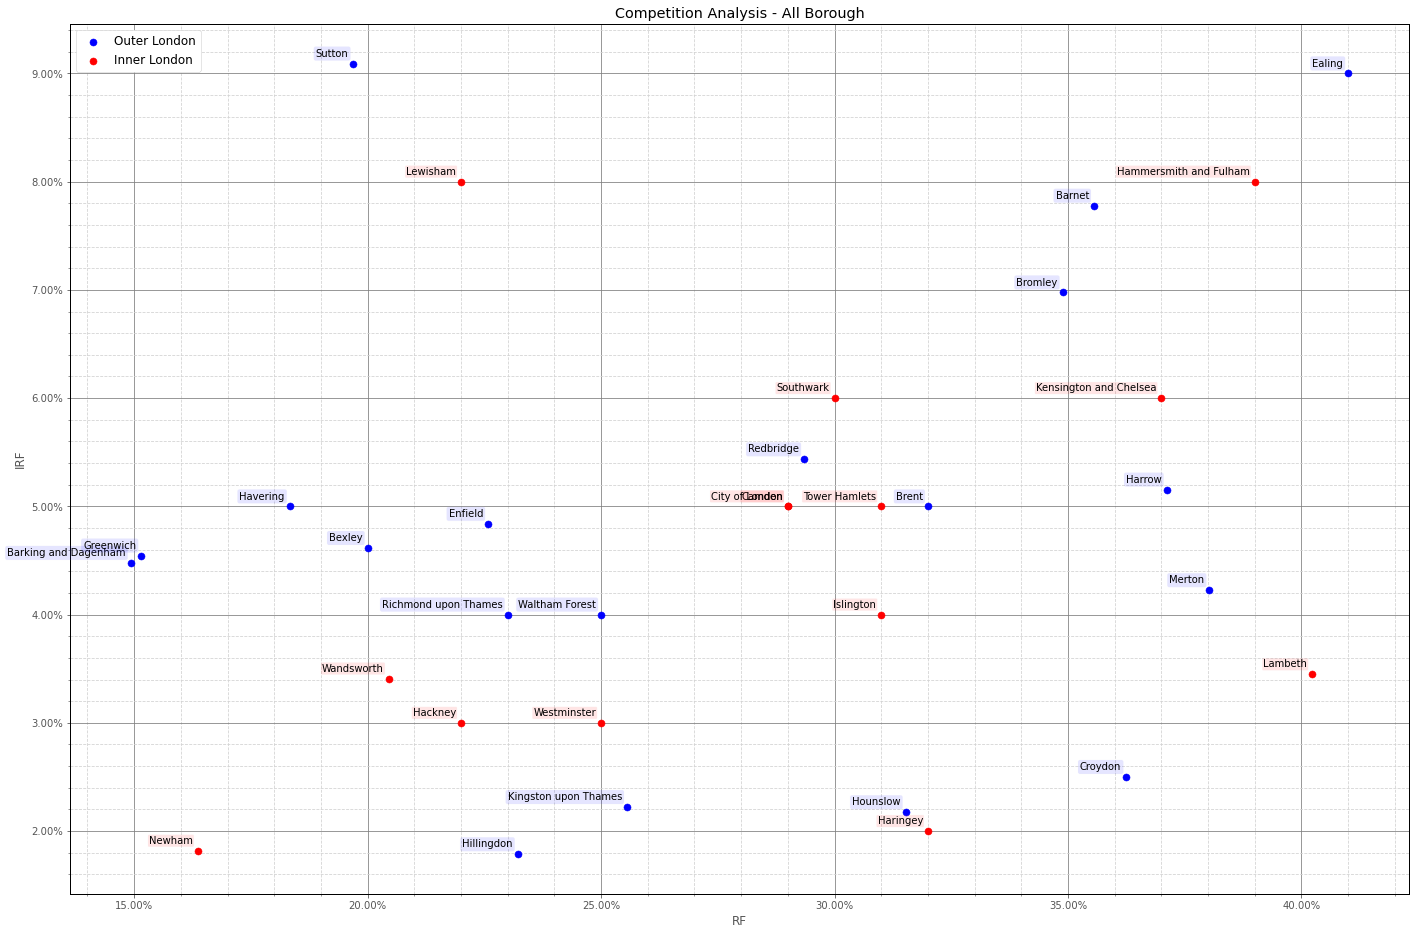

In [78]:
# scatter plot outer
ax0 = london_DF_outer.plot(kind='scatter',
                    x='All Restaurants',
                    y='Italian Restaurant',
                    figsize=(24, 16),
                    alpha=1,                  
                    color='blue',
                    s=50,  # pass in weights 
                   )

x = london_DF_outer['All Restaurants']
y = london_DF_outer['Italian Restaurant']
labels0 = london_DF_outer.index

for label, x, y in zip(labels0, x, y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-5, 10),
        textcoords='offset points', ha='right', va='center',
        bbox=dict(boxstyle='round,pad=0.2', fc='blue', alpha=0.1),
        )

# inner
ax1 = london_DF_inner.plot(kind='scatter',
                    x='All Restaurants',
                    y='Italian Restaurant',
                    figsize=(24, 16),
                    alpha=1,                  
                    color='red',
                    s=50,  # pass in weights
                    ax = ax0
                   )

x1 = london_DF_inner['All Restaurants']
y1 = london_DF_inner['Italian Restaurant']
labels1 = london_DF_inner.index

for label, x, y in zip(labels1, x1, y1):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-5, 10),
        textcoords='offset points', ha='right', va='center',
        bbox=dict(boxstyle='round,pad=0.1', fc='red', alpha=0.1),
        )
    

vals = ax0.get_yticks()
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in vals])    
vals = ax0.get_xticks()
ax0.set_xticklabels(['{:,.2%}'.format(x) for x in vals])     

plt.minorticks_on()
ax0.grid(b=True, which='major', color='grey', linestyle='-')
ax0.grid(b=True, which='minor', color='lightgrey', linestyle='--')

ax0.spines['bottom'].set_color('black')
ax0.spines['top'].set_color('black')
ax0.spines['right'].set_color('black')
ax0.spines['left'].set_color('black')
ax0.set_facecolor('white')

ax0.set_ylabel('IRF')
ax0.set_xlabel('RF')
ax0.set_title('Competition Analysis - All Borough')
ax0.legend(['Outer London', 'Inner London'], loc='upper left', fontsize=12, frameon  = True, facecolor = 'white', framealpha = 1)

### We now can display the three most interesting Boroughs in an interactive map

In [79]:
map_inner = london_DF_inner.loc[['Newham']]
map_inner

,All Restaurants,Italian Restaurant,Inner,Latitude,Longitude
Borough,,,,,
Newham,0.163636,0.018182,Inner London,51.5077,0.0469


In [84]:
map_outer = london_DF_outer.loc[['Greenwich', 'Barking and Dagenham', 'Hillingdon']]
map_outer

,All Restaurants,Italian Restaurant,Inner,Latitude,Longitude
Borough,,,,,
Greenwich,0.151515,0.045455,Outer London,51.4892,0.0648
Barking and Dagenham,0.149254,0.044776,Outer London,51.5607,0.1557
Hillingdon,0.232143,0.017857,Outer London,51.5441,-0.4760


In [85]:
final_map = folium.Map(location=[latitude, longitude], zoom_start=11, control_scale = True)

# add inner markers to map
for lat, lng, borough, allres, itares in zip(map_inner['Latitude'], map_inner['Longitude'], map_inner.index, map_inner['All Restaurants'], map_inner['Italian Restaurant']):
    label = '{}. Popularity of Restaurants = {}, Popularity of Italian Restaurants = {}'.format(borough, format(allres,'.2%'),format(itares,'.2%'))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=False,
        parse_html=False).add_to(final_map) 
# outer

for lat, lng, borough, allres, itares in zip(map_outer['Latitude'], map_outer['Longitude'], map_outer.index, map_outer['All Restaurants'], map_outer['Italian Restaurant']):
    label = '{}. Popularity of Restaurants = {}, Popularity of Italian Restaurants = {}'.format(borough, format(allres,'.2%'), format(itares,'.2%'))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=False,
        parse_html=False).add_to(final_map)  
 
final_map